In [5]:
from glob import iglob
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import numpy as np

In [6]:
%config InlineBackend.figure_format = 'svg'

In [7]:
path = 'pydata-book/datasets/babynames' # use your path
allFiles = iglob(path + "/*.txt")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,header=None,names=['name','gender','cnt'], sep=',')
    df['year']=file_[-8:-4]
    list_.append(df)

baby = pd.concat(list_, axis = 0, ignore_index = True)

In [8]:
baby.head()

,name,gender,cnt,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [9]:
#реализуйте группировку groupby
baby1=baby.groupby(['gender','year'])['cnt'].sum().reset_index()

In [10]:
baby1.head()

,gender,year,cnt
0,F,1880,90993
1,F,1881,91955
2,F,1882,107851
3,F,1883,112322
4,F,1884,129021


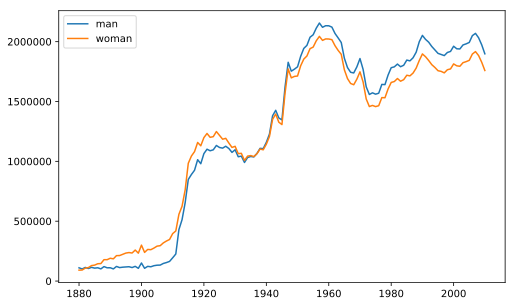

In [13]:
plt.plot(baby1[baby1['gender']=='M']['year'],baby1[baby1['gender']=='M']['cnt'] )
plt.plot(baby1[baby1['gender']=='F']['year'],baby1[baby1['gender']=='F']['cnt'])

plt.legend(['man','woman']);

In [16]:
baby[['name','cnt']].groupby('name').sum().sort_values(by='cnt', ascending=False).head()

,cnt
name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074


Разбейте весь временной промежуток в данных на 10 частей. Создайте массив с границами групп(бины). Ф-я quantile

In [22]:
bins=np.array(baby.year.astype(int).quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]))

In [27]:
bins=bins.astype(int)

Создайте новую колонку с номером группы, группа проставляется с помощью функций apply и searchsorted 

In [28]:
baby['group']=baby['year'].apply(lambda x: bins.searchsorted(x, side='left'))

In [29]:
baby.head()

,name,gender,cnt,year,group
0,Mary,F,7065,1880,0
1,Anna,F,2604,1880,0
2,Emma,F,2003,1880,0
3,Elizabeth,F,1939,1880,0
4,Minnie,F,1746,1880,0


Для каждой группы соберите статистику по имени и полу. Ф-я groupby

In [33]:
baby2_1=baby[['group','gender','name','cnt']].groupby(['group','gender','name']).sum()

In [34]:
baby2_1.head()

cnt
group gender name       
0     F      Aagot     5
             Aaron    22
             Abbey     8
             Abbie  4027
             Abby    280

Найдите самое популярное имя каждого пола в группе. 
Ф-я groupby,set_index, idxmax() 

In [38]:
baby2_1.groupby(['group','gender'])['cnt'].idxmax()

group  gender
0      F             (0, F, Mary)
       M             (0, M, John)
1      F             (1, F, Mary)
       M           (1, M, Robert)
2      F             (2, F, Mary)
       M            (2, M, James)
3      F             (3, F, Mary)
       M          (3, M, Michael)
4      F         (4, F, Jennifer)
       M          (4, M, Michael)
5      F         (5, F, Jennifer)
       M          (5, M, Michael)
6      F          (6, F, Jessica)
       M          (6, M, Michael)
7      F            (7, F, Emily)
       M          (7, M, Michael)
8      F            (8, F, Emily)
       M            (8, M, Jacob)
9      F         (9, F, Isabella)
       M            (9, M, Jacob)
Name: cnt, dtype: object

In [44]:
baby2_2=baby2_1.loc[baby2_1.groupby(['group','gender'])['cnt'].idxmax()].reset_index()

In [46]:
baby2_2[['gender','name']].drop_duplicates()

,gender,name
0,F,Mary
1,M,John
3,M,Robert
5,M,James
7,M,Michael
8,F,Jennifer
12,F,Jessica
14,F,Emily
17,M,Jacob
18,F,Isabella


Для каждого найденного имени визуализируйте его динамику за все время.
В цикле по всем именам применить функцию plt.plot()

In [39]:
baby[baby.name=='Mary'].head()

,name,gender,cnt,year,group
0,Mary,F,7065,1880,0
1273,Mary,M,27,1880,0
2000,Mary,F,6919,1881,0
3238,Mary,M,29,1881,0
3935,Mary,F,8149,1882,0


In [47]:
for i in baby2_2['name']:

     plt.plot(baby[(baby.name==i)&(baby.gender==j)]['year'],baby[(baby.name==i)&(baby.gender==j)]['cnt']);


Mary
John
Mary
Robert
Mary
James
Mary
Michael
Jennifer
Michael
Jennifer
Michael
Jessica
Michael
Emily
Michael
Emily
Jacob
Isabella
Jacob


Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год).Ф-я cumsum(), shift()

In [ ]:
baby['cumsum']=baby['cnt'].cumsum()
